In [199]:
# model 套件
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
import math
import warnings
warnings.filterwarnings('ignore')


# Second Preprocessing

In [200]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [201]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [202]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [203]:
df = pd.read_csv('Data/BayesianRidge_Pre_1/Input_A3_018.csv')
# df1 = pd.read_csv('Input_C_057.csv')
# df2 = pd.read_csv('Input_C_050.csv')

In [204]:
title = ['Input_A3_019','Input_A1_018','Input_A2_019','Input_A5_019']

# title = ['Input_A3_019','Input_A1_018','Input_A2_019','Input_A5_019','Input_A5_016',
#          'Input_A1_016','Input_A6_016','Input_A5_017','Input_A4_018','Input_A5_018']

In [205]:
# 直接執行轉換拉到最下面會發現 Wraninig
for col in title: # Predict 不做轉換
    if abs(df[col].skew()) >= 0.7: # 取偏態絕對值大於 0.5的項
        print(col)
        pt = PowerTransformer() # PowerTransformer 預設為 Yeo-Johson 轉換可轉正負數，不同於另一種 Box-Cox 只能用於正數
        d = pt.fit_transform(df[col].values.reshape(-1, 1)).flatten()
        df[col]=d

In [206]:
X = df[title]
scaler = RobustScaler()
df[title] = scaler.fit_transform(X)
y = df['Predict']

In [207]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [208]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

# Split data

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LassoCV

In [210]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],random_state = 42)
lasso.fit(X_train,y_train)
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00011


In [211]:
y_pred = lasso.predict(X_test)

In [212]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: -0.0242


In [213]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: 87.08


In [214]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 19


In [215]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.012886


In [216]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      61.543648
std       61.898402
min        6.224066
10%        6.224066
20%       29.668050
30%       29.668050
40%       40.663900
50%       40.663900
60%       40.663900
70%       43.734440
80%       98.771784
90%      181.327801
max      181.327801
Name: Predict, dtype: float64

In [217]:
lasso.coef_

array([0., 0., 0., 0.])

# Linear regresssion

In [218]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [219]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.000064


In [220]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.008028


In [221]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.6025


In [222]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: 49.31


In [223]:
# y_test : len 103
print("Number lower than error: %d"   
      % pNumber(y_test, y_pred, 15))

Number lower than error: 34


In [224]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      32.576140
std       37.202937
min        0.493140
10%        3.510155
20%        7.830699
30%       11.785841
40%       18.153773
50%       22.215304
60%       23.415728
70%       29.400652
80%       46.410823
90%       80.489300
max      227.714687
Name: Predict, dtype: float64

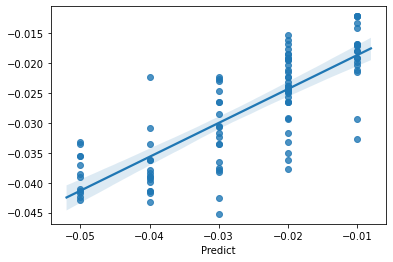

In [225]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, y_pred)

In [226]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - y_pred)

(0.4593528412985961, 0.2571801618597939)

# XGBoost regression

In [227]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew


# 先調 booster / n_estimators

In [228]:
#for tuning parameters
parameters_for_testing = {
    'booster':['gbtree','gblinear','dart'],
    'n_estimators':range(10,201,10),
}

other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 5, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0209s.) Setting batch_size=18.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'booster': 'dart', 'n_estimators': 60}
best score
0.4613271026794383


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.8s finished


# 調 max_depth / min_child_weight

In [229]:
#for tuning parameters
parameters_for_testing = {
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10], 
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 60, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0259s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:    0.1s


best params
{'max_depth': 1, 'min_child_weight': 1}
best score
0.48266601244636104


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.5s finished


# 調 gamma

In [230]:
#for tuning parameters
parameters_for_testing = {
    'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
best params
{'gamma': 0}
best score
0.48266601244636104


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0249s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   7 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished


# 調 subsample / colsample_bytree

In [231]:
#for tuning parameters
parameters_for_testing = {
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'reg_alpha': 0, 'reg_lambda': 1, 'gamma':0}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0229s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  28 tasks      | elapsed:    0.2s


best params
{'colsample_bytree': 0.8, 'subsample': 0.6}
best score
0.49084237542189973


[Parallel(n_jobs=6)]: Done 192 out of 192 | elapsed:    0.5s finished


# reg_alpha / reg_lambda

In [232]:
#for tuning parameters
parameters_for_testing = {
    'reg_alpha': [0,0.05, 0.1, 0.5 , 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5 , 1, 2, 3]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.6,'colsample_bytree': 0.8}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0348s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'reg_alpha': 0, 'reg_lambda': 1}
best score
0.49084237542189973


[Parallel(n_jobs=6)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1579s.) Setting batch_size=24.
[Parallel(n_jobs=6)]: Done  76 out of 126 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 126 out of 126 | elapsed:    0.3s finished


# learning_rate

In [233]:
#for tuning parameters
parameters_for_testing = {
   'learning_rate': [0.01, 0.05, 0.08, 0.1,0.3]
}

other_params = {'booster':'dart', '_estimators':60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.6,'colsample_bytree': 0.8,'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[00:26:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { _estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


best params
{'learning_rate': 0.08}
best score
0.4939221946413606


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0299s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.0s finished


In [234]:
best_xgb_model = XGBRegressor(
              learning_rate = 0.08,
              booster = 'dart', 
              n_estimators = 60, 
              max_depth = 1, 
              min_child_weight = 1,
              seed = 42,
              gamma = 0,
              subsample = 0.6,
              colsample_bytree = 0.8,
              reg_alpha =  0,
              reg_lambda = 1)

best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [235]:
y_pred = best_xgb_model.predict(X_test)

In [236]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test,y_pred))

R2 score: 0.5345


In [237]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage rmse score: 41.10


In [238]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 31


In [239]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error: 0.008687


In [240]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      30.738390
std       27.414061
min        1.077946
10%        4.579639
20%        7.831652
30%       15.523648
40%       19.253495
50%       23.602496
60%       30.417220
70%       37.216918
80%       43.733621
90%       66.447967
max      167.140269
Name: Predict, dtype: float64

In [241]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % best_xgb_model.score(X_train,y_train))

XGBoost regression score: 0.4235


# DecisionTree

In [242]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(
            criterion ='mse', 
            random_state = 42
)

In [243]:
param_grid = {'max_depth': range(1,10,1),
              'min_samples_split': range(2,16,2)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0189s.) Setting batch_size=20.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'max_depth': 4, 'min_samples_split': 14}
best score
0.4167259456657025


[Parallel(n_jobs=6)]: Done 189 out of 189 | elapsed:    0.1s finished


In [244]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,10,1)
              }
    
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 4,
            min_samples_split = 14,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0209s.) Setting batch_size=18.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1217s.) Setting batch_size=58.
[Parallel(n_jobs=6)]: Done 216 out of 216 | elapsed:    0.1s finished


best params
{'max_leaf_nodes': 9, 'min_samples_leaf': 9}
best score
0.43895165256032737


In [245]:
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 4,
            min_samples_split = 14,
            max_leaf_nodes = 9,
            min_samples_leaf = 9,
            random_state = 42
)
# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [246]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.71197917 0.14780714 0.04134806 0.09886563]


In [247]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.4856


In [248]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage rmse score: 55.72


In [249]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.009133


In [250]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    1.040000e+02
mean     3.696270e+01
std      4.190123e+01
min      5.204170e-14
10%      5.204170e-14
20%      4.245283e+00
30%      7.692308e+00
40%      1.660377e+01
50%      2.307692e+01
60%      3.266667e+01
70%      3.899371e+01
80%      6.551724e+01
90%      1.000000e+02
max      2.142857e+02
Name: Predict, dtype: float64

#  RandomForest

In [251]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(
          criterion ='mse', 
          random_state = 42
)

In [252]:
param_grid = {
              'n_estimators': range(5,51,5),
              'max_depth': range(1,10,1),
              'min_samples_split': range(2,10,1)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0239s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 140 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 284 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 428 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 604 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 780 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 988 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 1196 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 1436 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 1676 tasks      | elapsed:    7.8s
[Parallel(n_jobs=6)]: Done 1948 tasks      | elapsed:    9.0s


best params
{'max_depth': 4, 'min_samples_split': 9, 'n_estimators': 20}
best score
0.4912700675980914


[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:   10.0s finished


In [253]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,15,1)
              }
    
clf = RandomForestRegressor(
            criterion ='mse', 
            n_estimators = 20,
            max_depth = 4,
            min_samples_split = 9,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 117 candidates, totalling 351 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0317s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 216 tasks      | elapsed:    0.8s


best params
{'max_leaf_nodes': 11, 'min_samples_leaf': 1}
best score
0.49363417161251905


[Parallel(n_jobs=6)]: Done 351 out of 351 | elapsed:    1.2s finished


In [254]:
clf = RandomForestRegressor( 
            criterion ='mse', 
            n_estimators =20,
            max_depth = 4,
            min_samples_split = 9,
            max_leaf_nodes = 11,
            min_samples_leaf = 1,
            random_state = 42) 
#給予max_depth 可以避免過度擬和

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [255]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.47968772 0.14181398 0.1931523  0.185346  ]


In [256]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.5123


In [257]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage rmse score: 55.25


In [258]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.008893


In [259]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      36.418301
std       41.752519
min        0.019518
10%        1.518901
20%        4.148194
30%        8.721181
40%       15.475154
50%       21.829542
60%       28.035654
70%       40.675946
80%       59.237996
90%       98.360096
max      238.129304
Name: Predict, dtype: float64

In [67]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 